In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWar

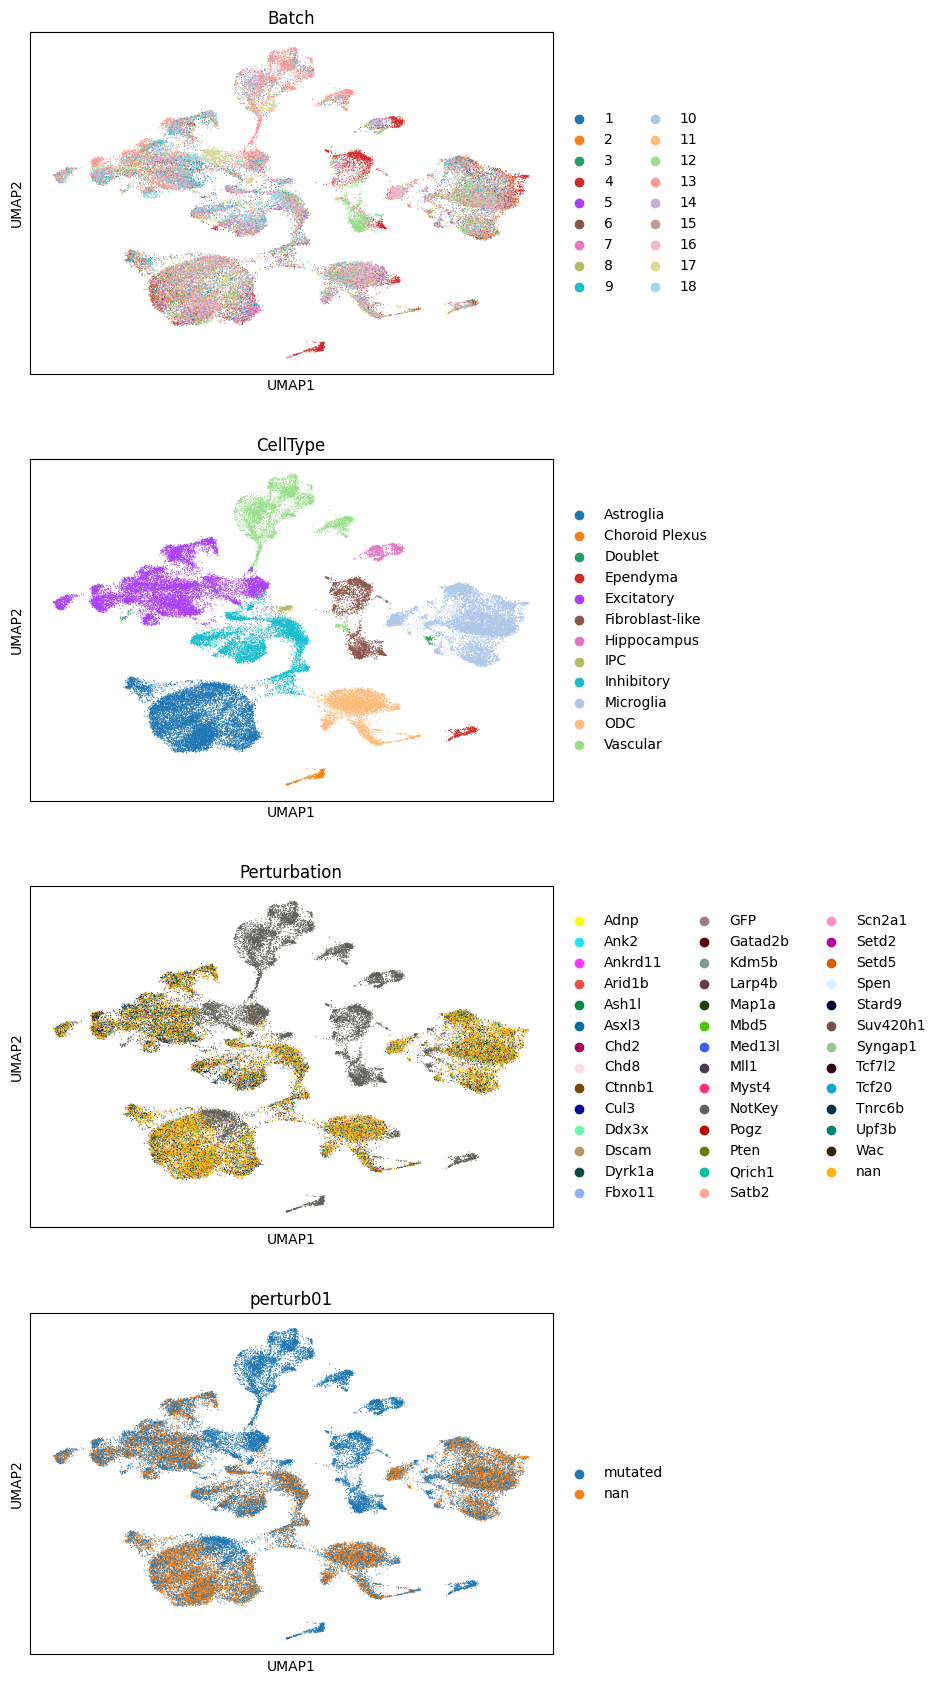

  (6, 3)	7.2946487766577
  (9, 3)	6.01191798864841
AnnData object with n_obs × n_vars = 49067 × 2000
    obs: 'nGene', 'nUMI', 'Cluster', 'Batch', 'CellType', 'Perturbation', 'isKey', 'isAnalysed', 'SCRUBLET', 'perturb01'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'CellType_colors', 'Perturbation_colors', 'hvg', 'neighbors', 'pca', 'perturb01_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [2]:
adata=sc.read_h5ad("../data/ASD.h5ad")
sc.pl.umap(adata,color=["Batch","CellType","Perturbation","perturb01"],ncols=1)
print(adata.X[:10,:10])
print(adata)

In [3]:
from ndreamer import NDreamer
print(adata.shape)
model = NDreamer(adata, condition_key='Perturbation', contorl_name='nan', num_hvg=2000, require_batch=True,
                            batch_key='Batch',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 

(49067, 2000)
Start data preprocessing
Original adata.obs[Batch] back up to adata.obs['batch_backup']
Original adata.obs[condition_key] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'nan': 0, 'Med13l': 1, 'NotKey': 2, 'Tnrc6b': 3, 'Stard9': 4, 'Asxl3': 5, 'Mbd5': 6, 'Wac': 7, 'Larp4b': 8, 'Setd5': 9, 'Spen': 10, 'Scn2a1': 11, 'Kdm5b': 12, 'Setd2': 13, 'Ankrd11': 14, 'Myst4': 15, 'Fbxo11': 16, 'Ctnnb1': 17, 'Gatad2b': 18, 'Pogz': 19, 'Upf3b': 20, 'Ddx3x': 21, 'Cul3': 22, 'Syngap1': 23, 'Ash1l': 24, 'Tcf20': 25, 'Ank2': 26, 'GFP': 27, 'Qrich1': 28, 'Arid1b': 29, 'Tcf7l2': 30, 'Dscam': 31, 'Mll1': 32, 'Dyrk1a': 33, 'Chd8': 34, 'Map1a': 35, 'Adnp': 36, 'Pten': 37, 'Chd2': 38, 'Suv420h1': 39, 'Satb2': 40}
Condition mapping to adata.obs['batch']: {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17}
Calculating the clusters
Unique groups: ['0_An

Overall Progress:   0%|          | 0/478 [00:00<?, ?it/s]

ValueError: Expected parameter loc (Tensor of shape (2048, 256)) of distribution Normal(loc: torch.Size([2048, 256]), scale: torch.Size([2048, 256])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], grad_fn=<AddmmBackward0>)

In [ ]:
model = NDreamer(adata, condition_key='perturb01', contorl_name='nan', num_hvg=2000, require_batch=True,
                            batch_key='Batch',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD01/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD01/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 

In [ ]:
model = NDreamer(adata, condition_key='perturb01', contorl_name='nan', num_hvg=2000, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD01_nobatch/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD01_nobatch/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 